In [32]:
# imports and PERSONAL constants
%matplotlib inline

import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

RESULTS_DIR = "./bernoulli_vae_mnist_h500_k1_z"
RESULTS_F = "results.csv"
dims = [3, 5, 10, 20, 200]

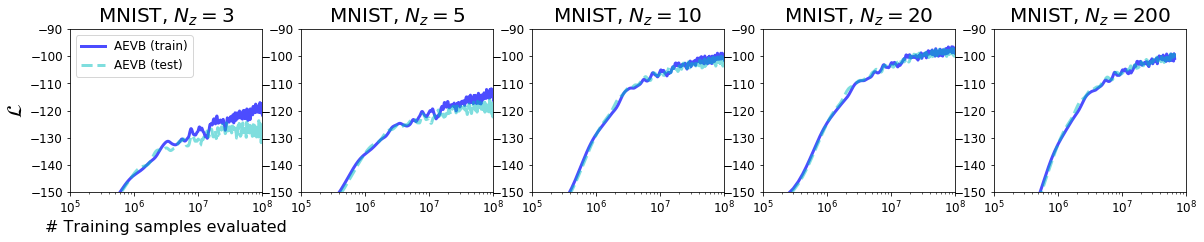

In [48]:
matplotlib.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(20,3))

for i, dim in enumerate(dims):
    train = os.path.join(RESULTS_DIR + str(dim), RESULTS_F)
    train_df = pd.read_csv(train)

    train_smoothed = gaussian_filter1d(train_df['ELBO'], sigma=5)
    test_smoothed = gaussian_filter1d(train_df['Test ELBO'], sigma=5)

    ax = fig.add_subplot(1, 5, i+1)
    ax.set_xscale("log")
    ax.set_xlim(left=10**5, right=10**8)
    ax.set_ylim(bottom=-150, top=-90)
    

    # raw_train_line, = ax.plot(train_df['Samples'], train_df['ELBO'], color="b", label="raw")
    smooth_train_line, = ax.plot(train_df['Samples'], train_smoothed, linewidth=3, color='b', 
                                 label="AEVB (train)", alpha=0.7)
    # raw_test_line, = ax.plot(train_df['Samples'], train_df['Test ELBO'], color="g", label="raw")
    smooth_test_line, = ax.plot(train_df['Samples'], test_smoothed, linewidth=3, linestyle='--',
                                color='c', label="AEVB (test)", alpha=0.5)
    
    if i == 0:
        ax.set_xlabel('# Training samples evaluated', fontsize=16)
        ax.set_ylabel(r'$\mathcal{L}$', fontsize=20)
        plt.legend(loc="upper left")
        
    plt.title(r"MNIST, $N_z =$" + str(dim), fontsize=20)
plt.show()